# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress



# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ImportError: cannot import name 'weather_api_key' from 'config' (C:\Users\hmosb\Anaconda3\lib\site-packages\config\__init__.py)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

NameError: name 'citipy' is not defined

In [20]:
column_names = ('City Name', 'Country Code', 'Rand Lat', 'Rand Lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_chart_df = pd.DataFrame(columns = column_names)
cities_chart_df

,City Name,Country Code,Rand Lat,Rand Lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}
search_data = []
city_List = []
country_List = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        countryyyy = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(countryyyy)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
---------------------------------------
Processing Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness, 'Date': date, 'Humidity': humidity, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data,index = False)
weather_list_df.head(5)

NameError: name 'output_data' is not defined

In [25]:
len(search_data)

0

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

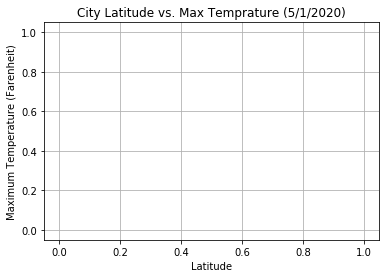

In [29]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature (5/1/2020)")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_MT.png')

#### Latitude vs. Humidity Plot

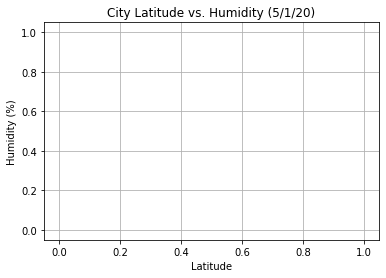

In [30]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Humidity'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,300)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Humidity (5/1/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Hum.png')

#### Latitude vs. Cloudiness Plot

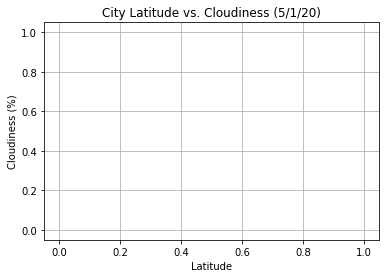

In [31]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,100)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Cloudiness (5/1/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_Cl.png')

#### Latitude vs. Wind Speed Plot

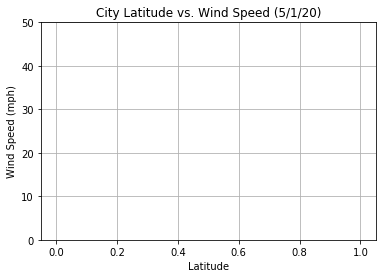

In [32]:
plt.scatter(weather_list_df['Lat'], weather_list_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(0,50)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Wind Speed (5/1/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('../output_data/Lat_W.png')

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots

In [38]:
# Create Northern and Southern Hemisphere DataFrames
northern_x_v = weather_list_df[weather_list_df['Lat']<1]
southern_x_v = weather_list_df[weather_list_df['Lat']>1]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
x_values=northern_x_v['Lat']

y_values = northern_x_v['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_MT.png')

ValueError: Inputs must not be empty.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [40]:
x_values =southern_x_v['Lat']

y_values = southern_x_v['Max Temp']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/S_linear_Lat_MT.png')

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


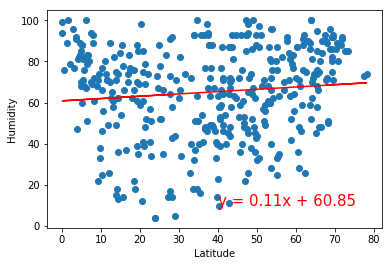

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


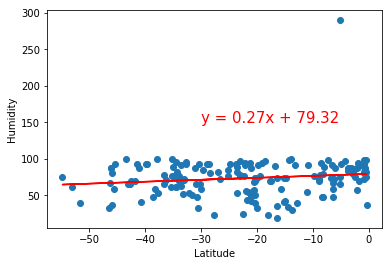

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


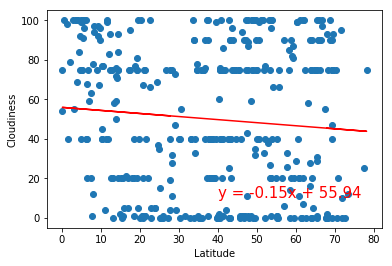

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


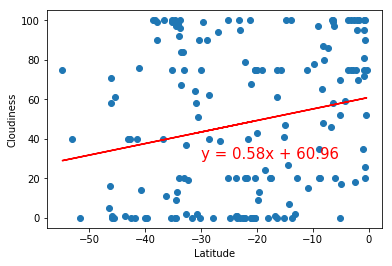

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


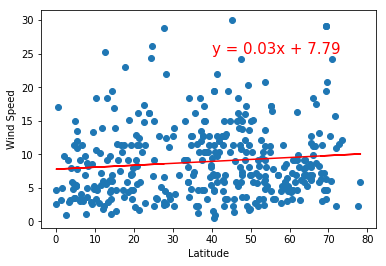

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


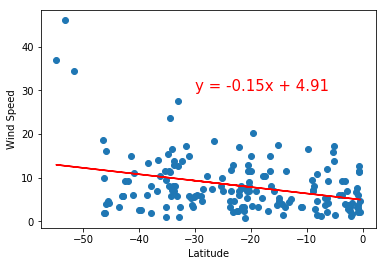